In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the Data

In [22]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Look at an image

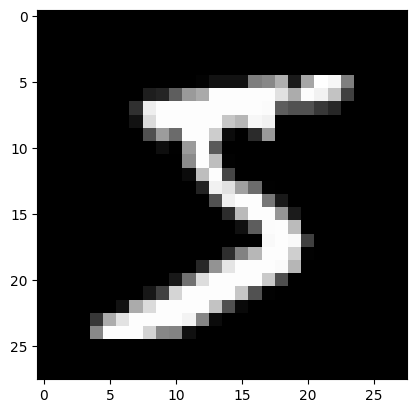

In [23]:
plt.imshow(x_train[0], cmap = 'gray')

# Build your model:

model = *code to create tensorflow Sequential model*

model.add( layers.Dense() )
  - Specify how many neurons, and activation function. ex( model.Dense(3, activation = 'sigmoid') )

model.add( layers.Flatten() )
  - Flattens the image into one flat line

After the model is created, you can do model.compile()
  - Specify loss function, and optimizer
  - ex. model.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )




In [24]:
#define your model here
model = tf.keras.models.Sequential()

In [25]:
#create your model here

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4894 - loss: 3.9613
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8523 - loss: 0.5654
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9231 - loss: 0.3002
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9455 - loss: 0.2121
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9528 - loss: 0.1775
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9611 - loss: 0.1475
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9650 - loss: 0.1344
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9674 - loss: 0.1186
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9718 - loss: 0.1041
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9736 - loss: 0.0956


Look at 5 predictions for train data:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


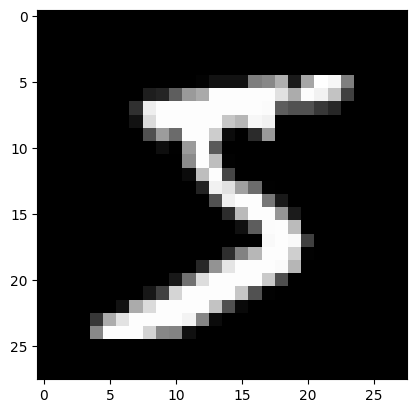

Prediction:  5


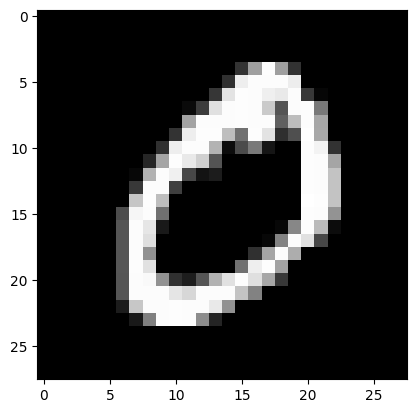

Prediction:  0


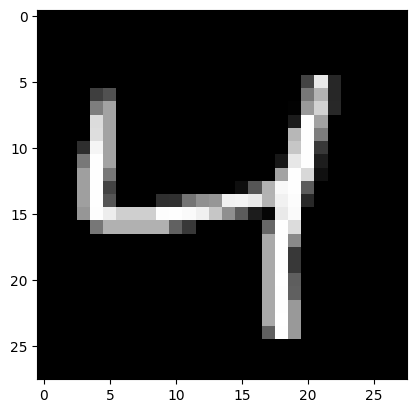

Prediction:  4


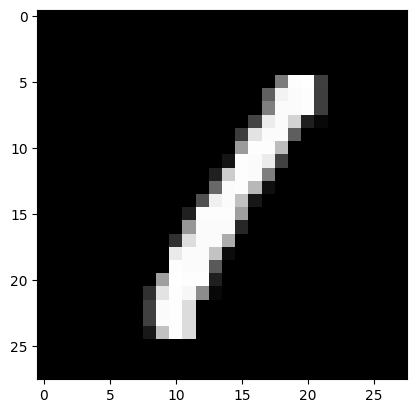

Prediction:  1


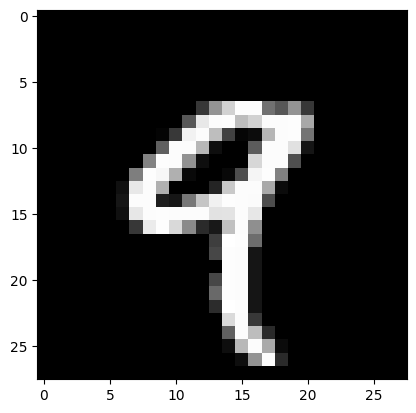

Prediction:  9


In [26]:
number_of_images = 5

probabilities = model.predict(x_train[:number_of_images])
predictions = np.argmax(probabilities, axis=1)
for index in range(len(probabilities)):
  plt.imshow(x_train[index], cmap='gray')
  plt.show()
  print("Prediction: ", predictions[index])

Look at 5 predictions for test data:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


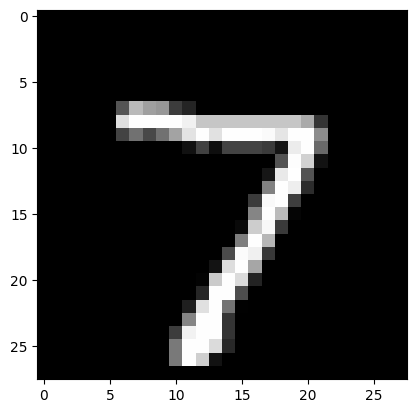

Prediction:  7
Actual:  7


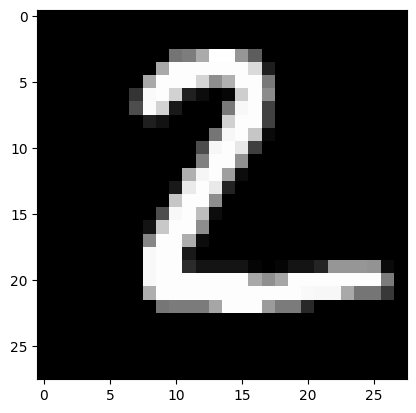

Prediction:  2
Actual:  2


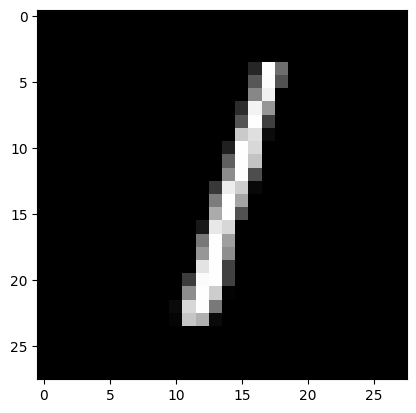

Prediction:  1
Actual:  1


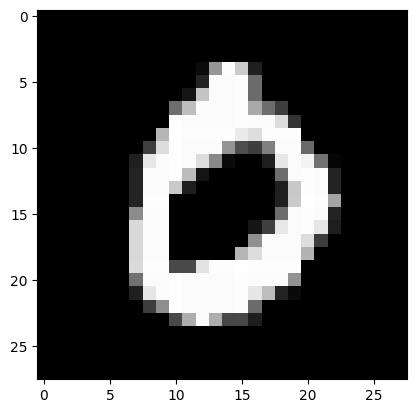

Prediction:  0
Actual:  0


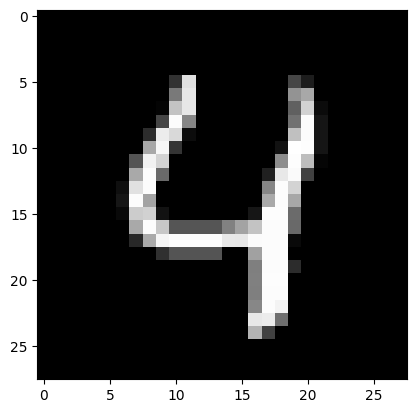

Prediction:  4
Actual:  4


In [27]:
number_of_images = 5

probabilities = model.predict(x_test[:number_of_images])
predictions = np.argmax(probabilities, axis=1)
for index in range(len(probabilities)):
    plt.imshow(x_test[index], cmap='gray')
    plt.show()
    print("Prediction: ", predictions[index])
    print("Actual: ", y_test[index])

Look at 5 incorrect predictions for test data:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


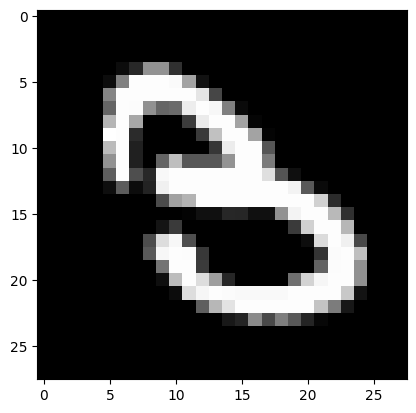

Prediction:  8
Actual:  3


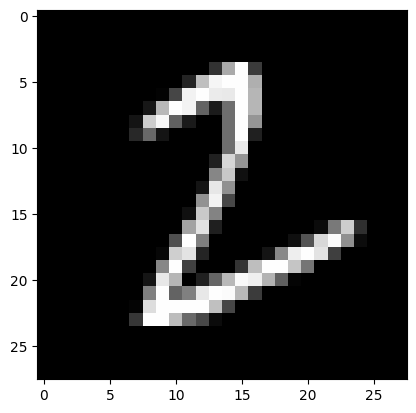

Prediction:  3
Actual:  2


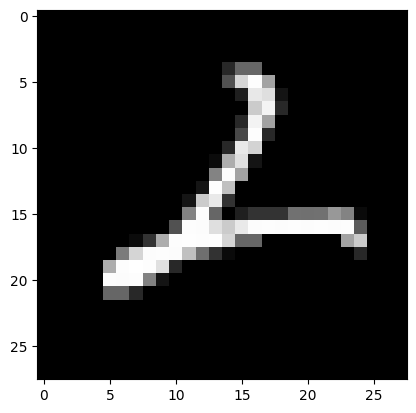

Prediction:  4
Actual:  2


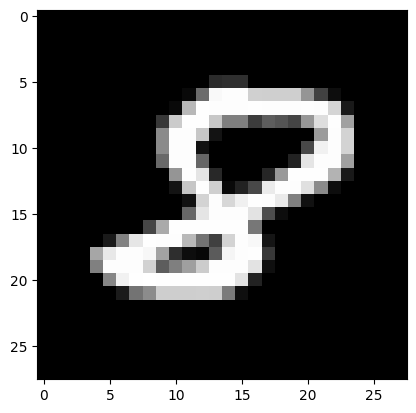

Prediction:  2
Actual:  8


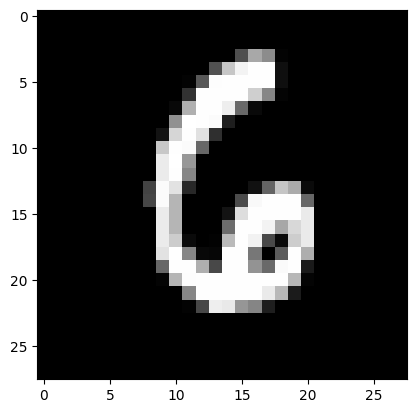

Prediction:  0
Actual:  6


In [28]:
probabilities = model.predict(x_test)
predictions = np.argmax(probabilities, axis=1)
count = 0
for index in range(len(probabilities)):
  if predictions[index] != y_test[index]:
    plt.imshow(x_test[index], cmap='gray')
    plt.show()
    print("Prediction: ", predictions[index])
    print("Actual: ", y_test[index])
    count += 1
    if count == 5:
      break

Analyze model accuracy:

In [29]:
from sre_constants import SUCCESS
probabilities = model.predict(x_test)
predictions = np.argmax(probabilities, axis=1)
successes = 0
fails = 0
for index in range(len(probabilities)):
  if predictions[index] == y_test[index]:
    successes += 1
  else:
    fails += 1

print("Accuracy: ", successes * 100 / (successes + fails), "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy:  96.3 %
